### Visualizing intermediate activations

In [1]:
from keras.models import load_model
model = load_model('saved model/tomato_small_1.h5')
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 256)       295168    
__________

### Preprocessing a single image

In [2]:
img_path = './test.jpg'
from keras.preprocessing import image
import numpy as np

# Preprocesses the image into a 4D tensor
img = image.load_img(img_path,color_mode = "grayscale", target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255. #Remember t### Displaying the test picturehat the model was trained on inputs that were preprocessed this way.

print(img_tensor.shape)

(1, 150, 150, 1)


### Displaying the test picture

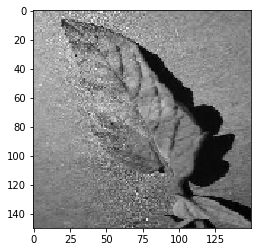

In [3]:
import matplotlib.pyplot as plt
# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline
plt.imshow(img_tensor[0].reshape([150, 150]) , cmap='gray')
plt.show()

### Instantiating a model from an input tensor and a list of output tensors

In [4]:
from keras import models
#Extracts the outputs of the top five layers
layer_outputs = [layer.output for layer in model.layers[:9]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

### Running the model in predict mode

In [5]:
# Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[2]
print(first_layer_activation.shape)

(1, 72, 72, 64)


### Visualizing the fourth channel

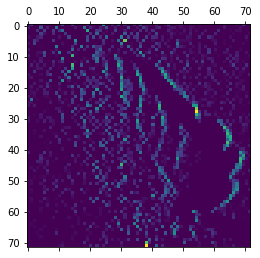

In [6]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

### Visualizing every channel in every intermediate activation

c:\users\belal\anaconda3\envs\tr1env\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


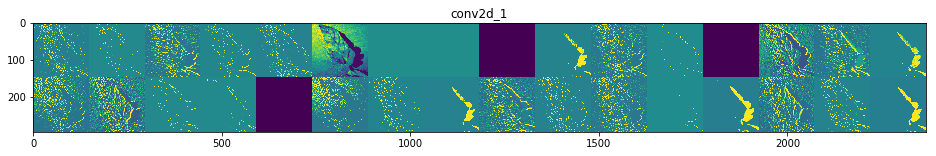

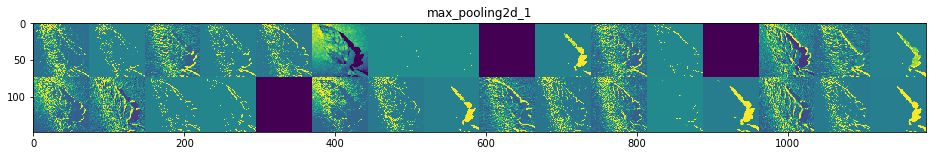

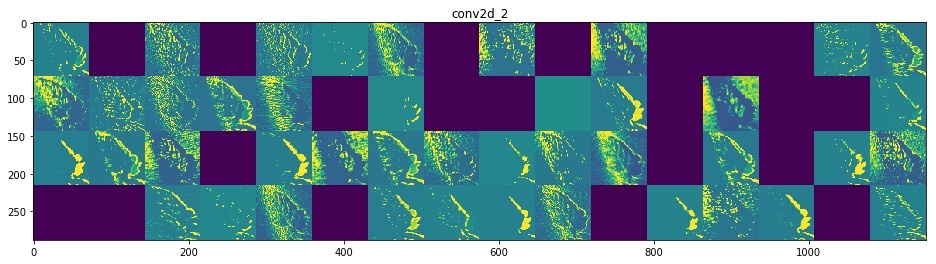

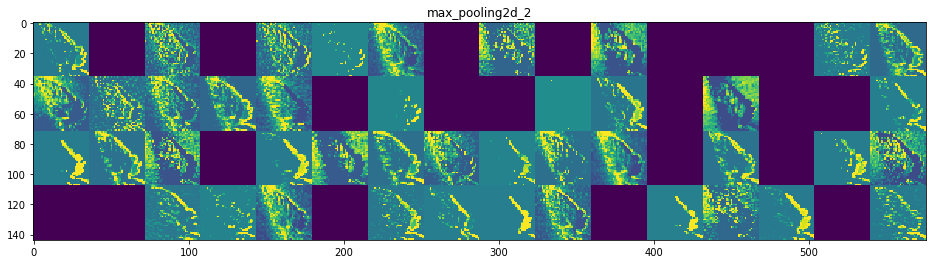

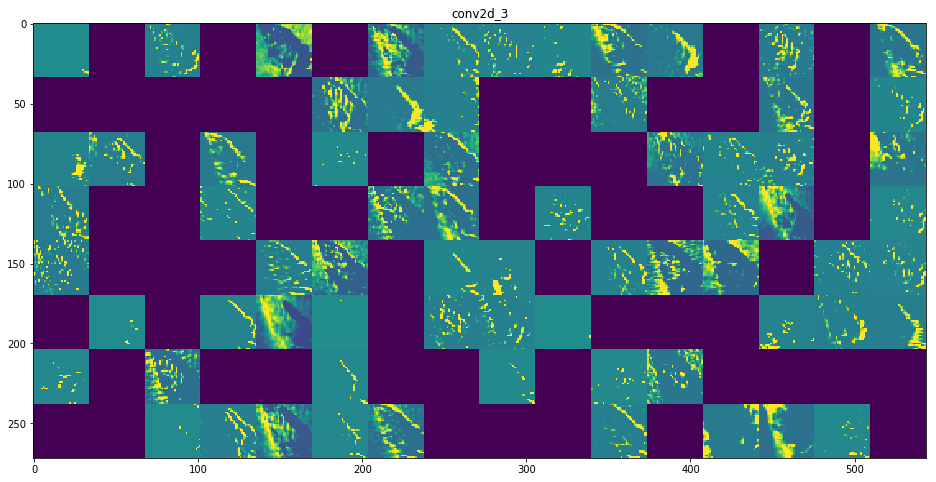

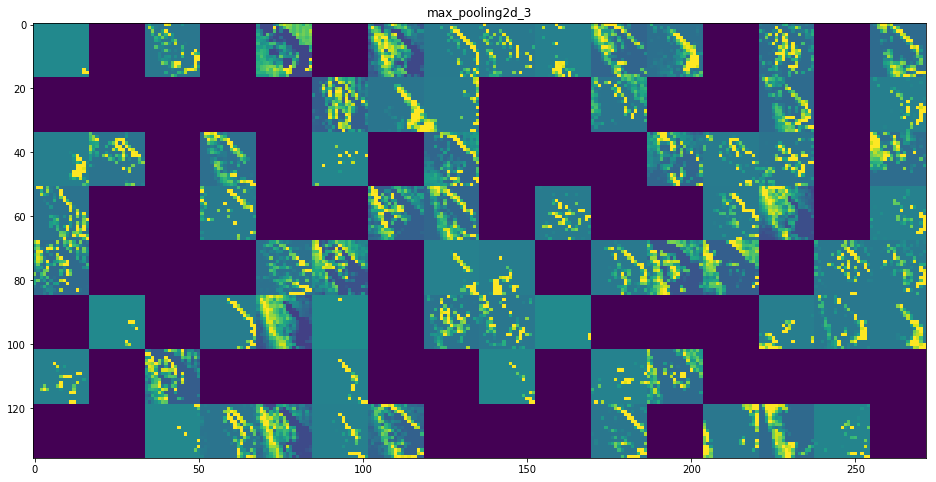

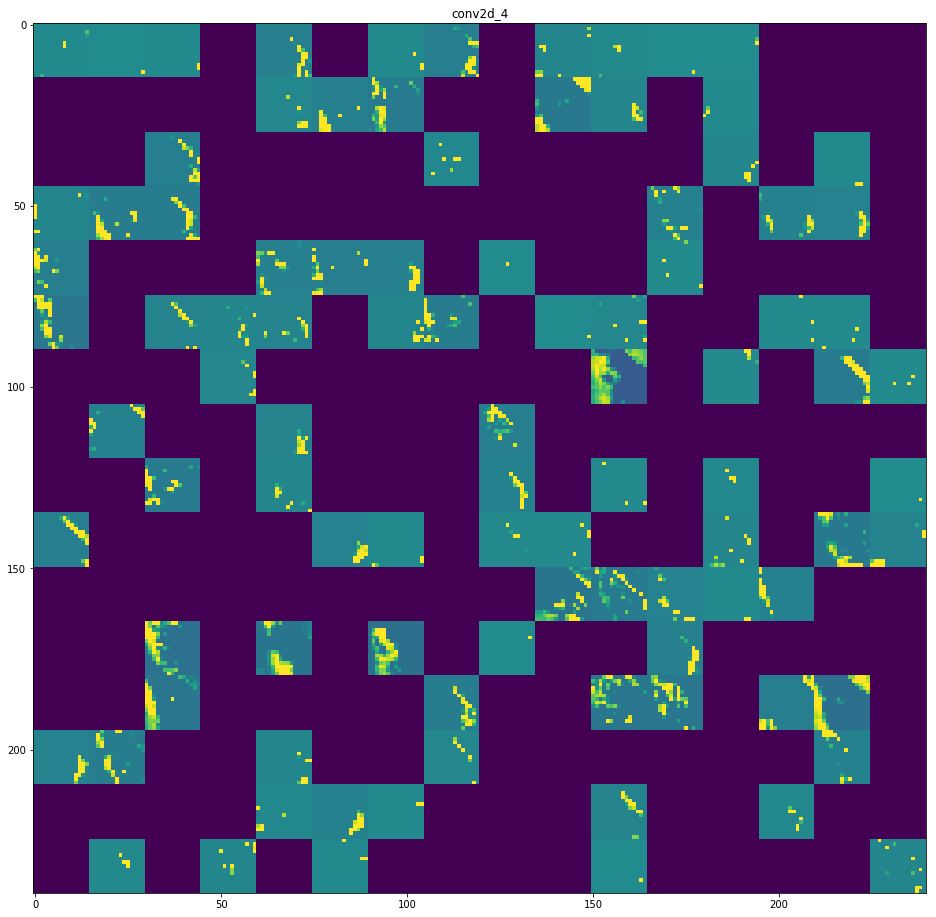

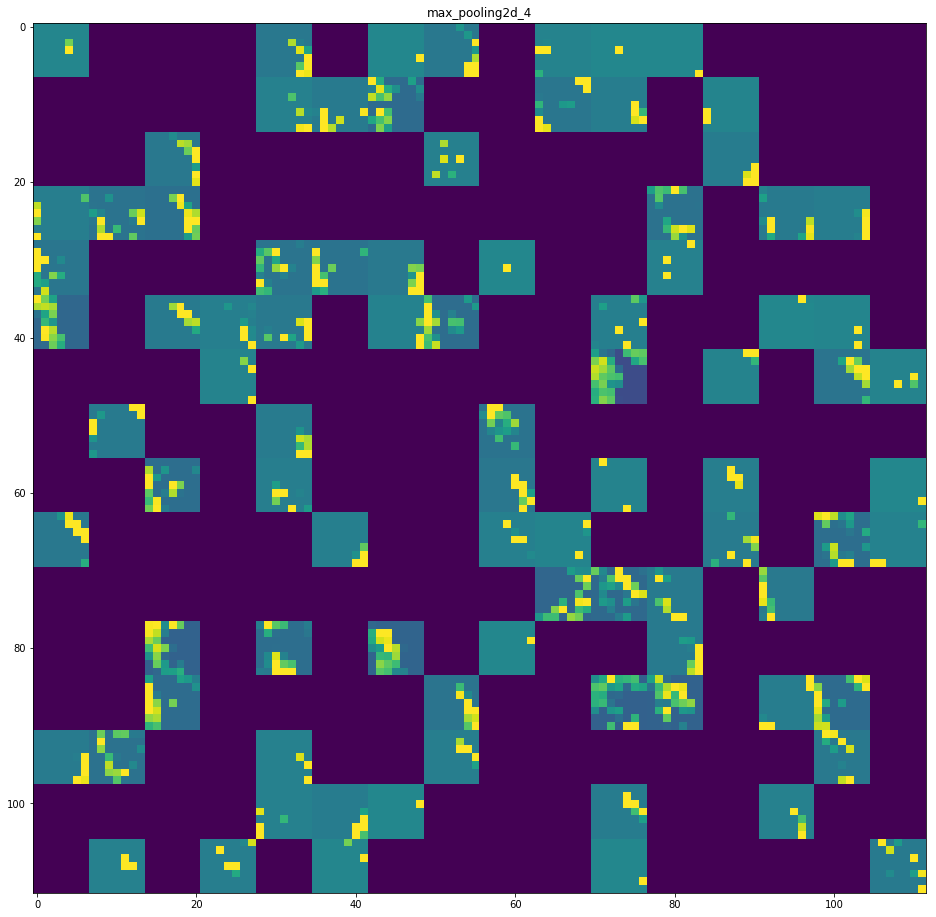

In [7]:
#Names of the layers, so you can have them as part of your plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row = 16
#Displays the feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    #Number of features in the feature map
    n_features = layer_activation.shape[-1]
    #The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]
    #Tiles the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    #Tiles each filter into a big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            # Post-processes the feature to make it visually palatable
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            #Displays the grid
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')